# Garantia de aprendizagem e overfitting  
   
    Garantia de aprendizagem e overfitting são dois conceitos fundamentais em modelos de classificação na aprendizagem de máquina, representando dois lados de uma mesma moeda.

    A garantia de aprendizagem foca na capacidade do modelo de generalizar bem, ou seja, de aplicar o que aprendeu com os dados de treinamento para prever ou classificar dados novos e desconhecidos de forma eficaz. Um modelo com boa garantia de aprendizagem é capaz de identificar e aprender padrões verdadeiramente representativos dos dados, sem ser influenciado por peculiaridades ou ruídos específicos do conjunto de treinamento.

    Por outro lado, overfitting ocorre quando um modelo aprende demais dos dados de treinamento, incluindo ruídos e detalhes que não são representativos do conjunto de dados geral. Isso leva a uma performance excepcional nos dados de treinamento, mas a resultados pobres em dados novos, pois o modelo falha em generalizar o que aprendeu.

    Portanto, o desafio na construção de modelos de regressão eficazes é encontrar um equilíbrio entre garantir uma aprendizagem suficiente para capturar as tendências principais dos dados e, ao mesmo tempo, evitar o overfitting que restringe a capacidade do modelo de se adaptar a novas informações. Este equilíbrio é frequentemente alcançado através de técnicas como validação cruzada, regularização, e escolhendo a complexidade do modelo apropriada para a quantidade e variedade de dados disponíveis.

In [7]:
import math
import numpy                           as np
from matplotlib import pyplot          as plt
from sklearn    import model_selection as ms
from sklearn    import metrics         as mt

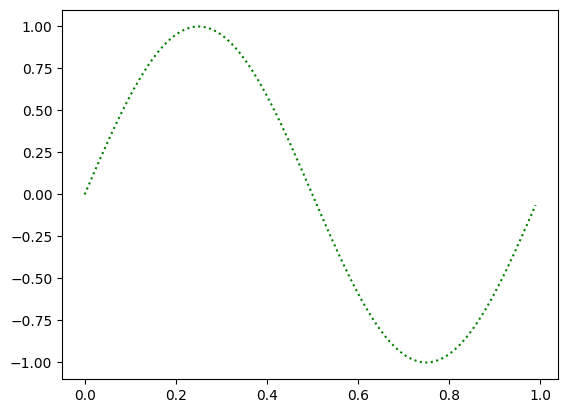

In [26]:
#Creation of a sinusoidal model for generating synthetic data.
# Criação de uma fonte geradora
hidden_law = np.vectorize(lambda x: math.sin(2 * math.pi * x)) # "np.vectorize"é útil quando você precisa aplicar rapidamente uma função 
                                                               # personalizada a arrays sem ter que reescrever a função para lidar com
                                                               # operações vetoriais. Ela é mais valiosa pela conveniência e clareza 
                                                               # do código do que pela velocidade.

x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)
plt.plot(x_all,y_hidden, ':g')

In [35]:
# Daados sintéticos
# Synthetic Regression data

np.random.seed(42)
noise = 0.2
samples = 20

x = np.random.rand(samples)
y = np.sin(2 * np.pi * x) + noise * np.random.randn(samples)

# Dividir em treino e Validação
# Split train test dataset

x_train,x_val, y_train, y_val = ms.train_test_split(x,y, test_size=0.3)

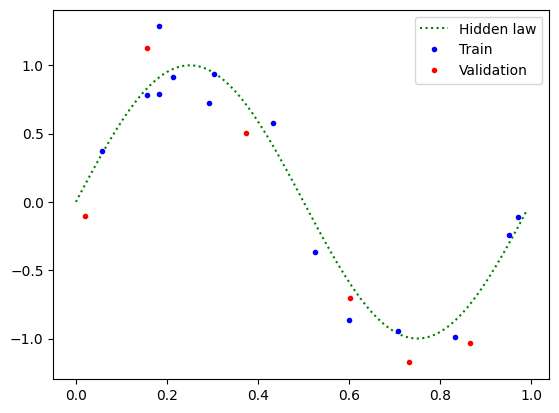

In [34]:
plt.plot(x_all,y_hidden, ':g')
plt.plot(x_train,y_train, 'b.')
plt.plot(x_val, y_val, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation'])

In [36]:
# Treinamento
# Training

max_poly_degree = 14 # Numero grau máximo polinomio
poly_degrees = range(max_poly_degree)
polys = []
for p in poly_degrees:
    poly_model = np.polyfit(x_train,y_train, p)
    polys.append(poly_model)
    
#Predição
# Predict

rmse_train = np.zeros(max_poly_degree)
rmse_val = np.zeros(max_poly_degree)
for p in poly_degrees:
    # Predição dos dados de treino
    # predict over train dataset
    yhat_train = np.polyval( polys[p],x_train)
    rmse_train[p] = np.sqrt(mt.mean_squared_error(y_train,yhat_train))
    
    # Predição dos dados de validação
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_val)
    rmse_val[p] = np.sqrt (mt.mean_squared_error(y_val,yhat_val))

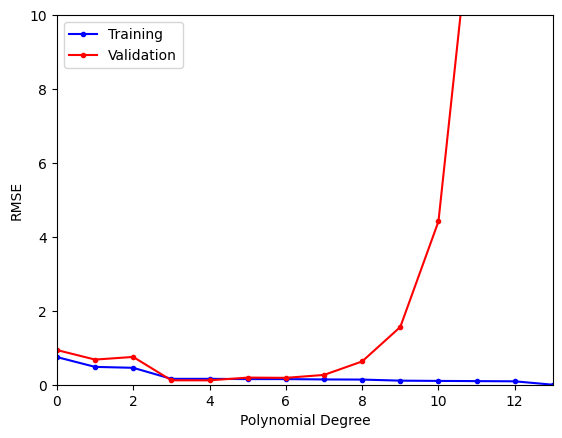

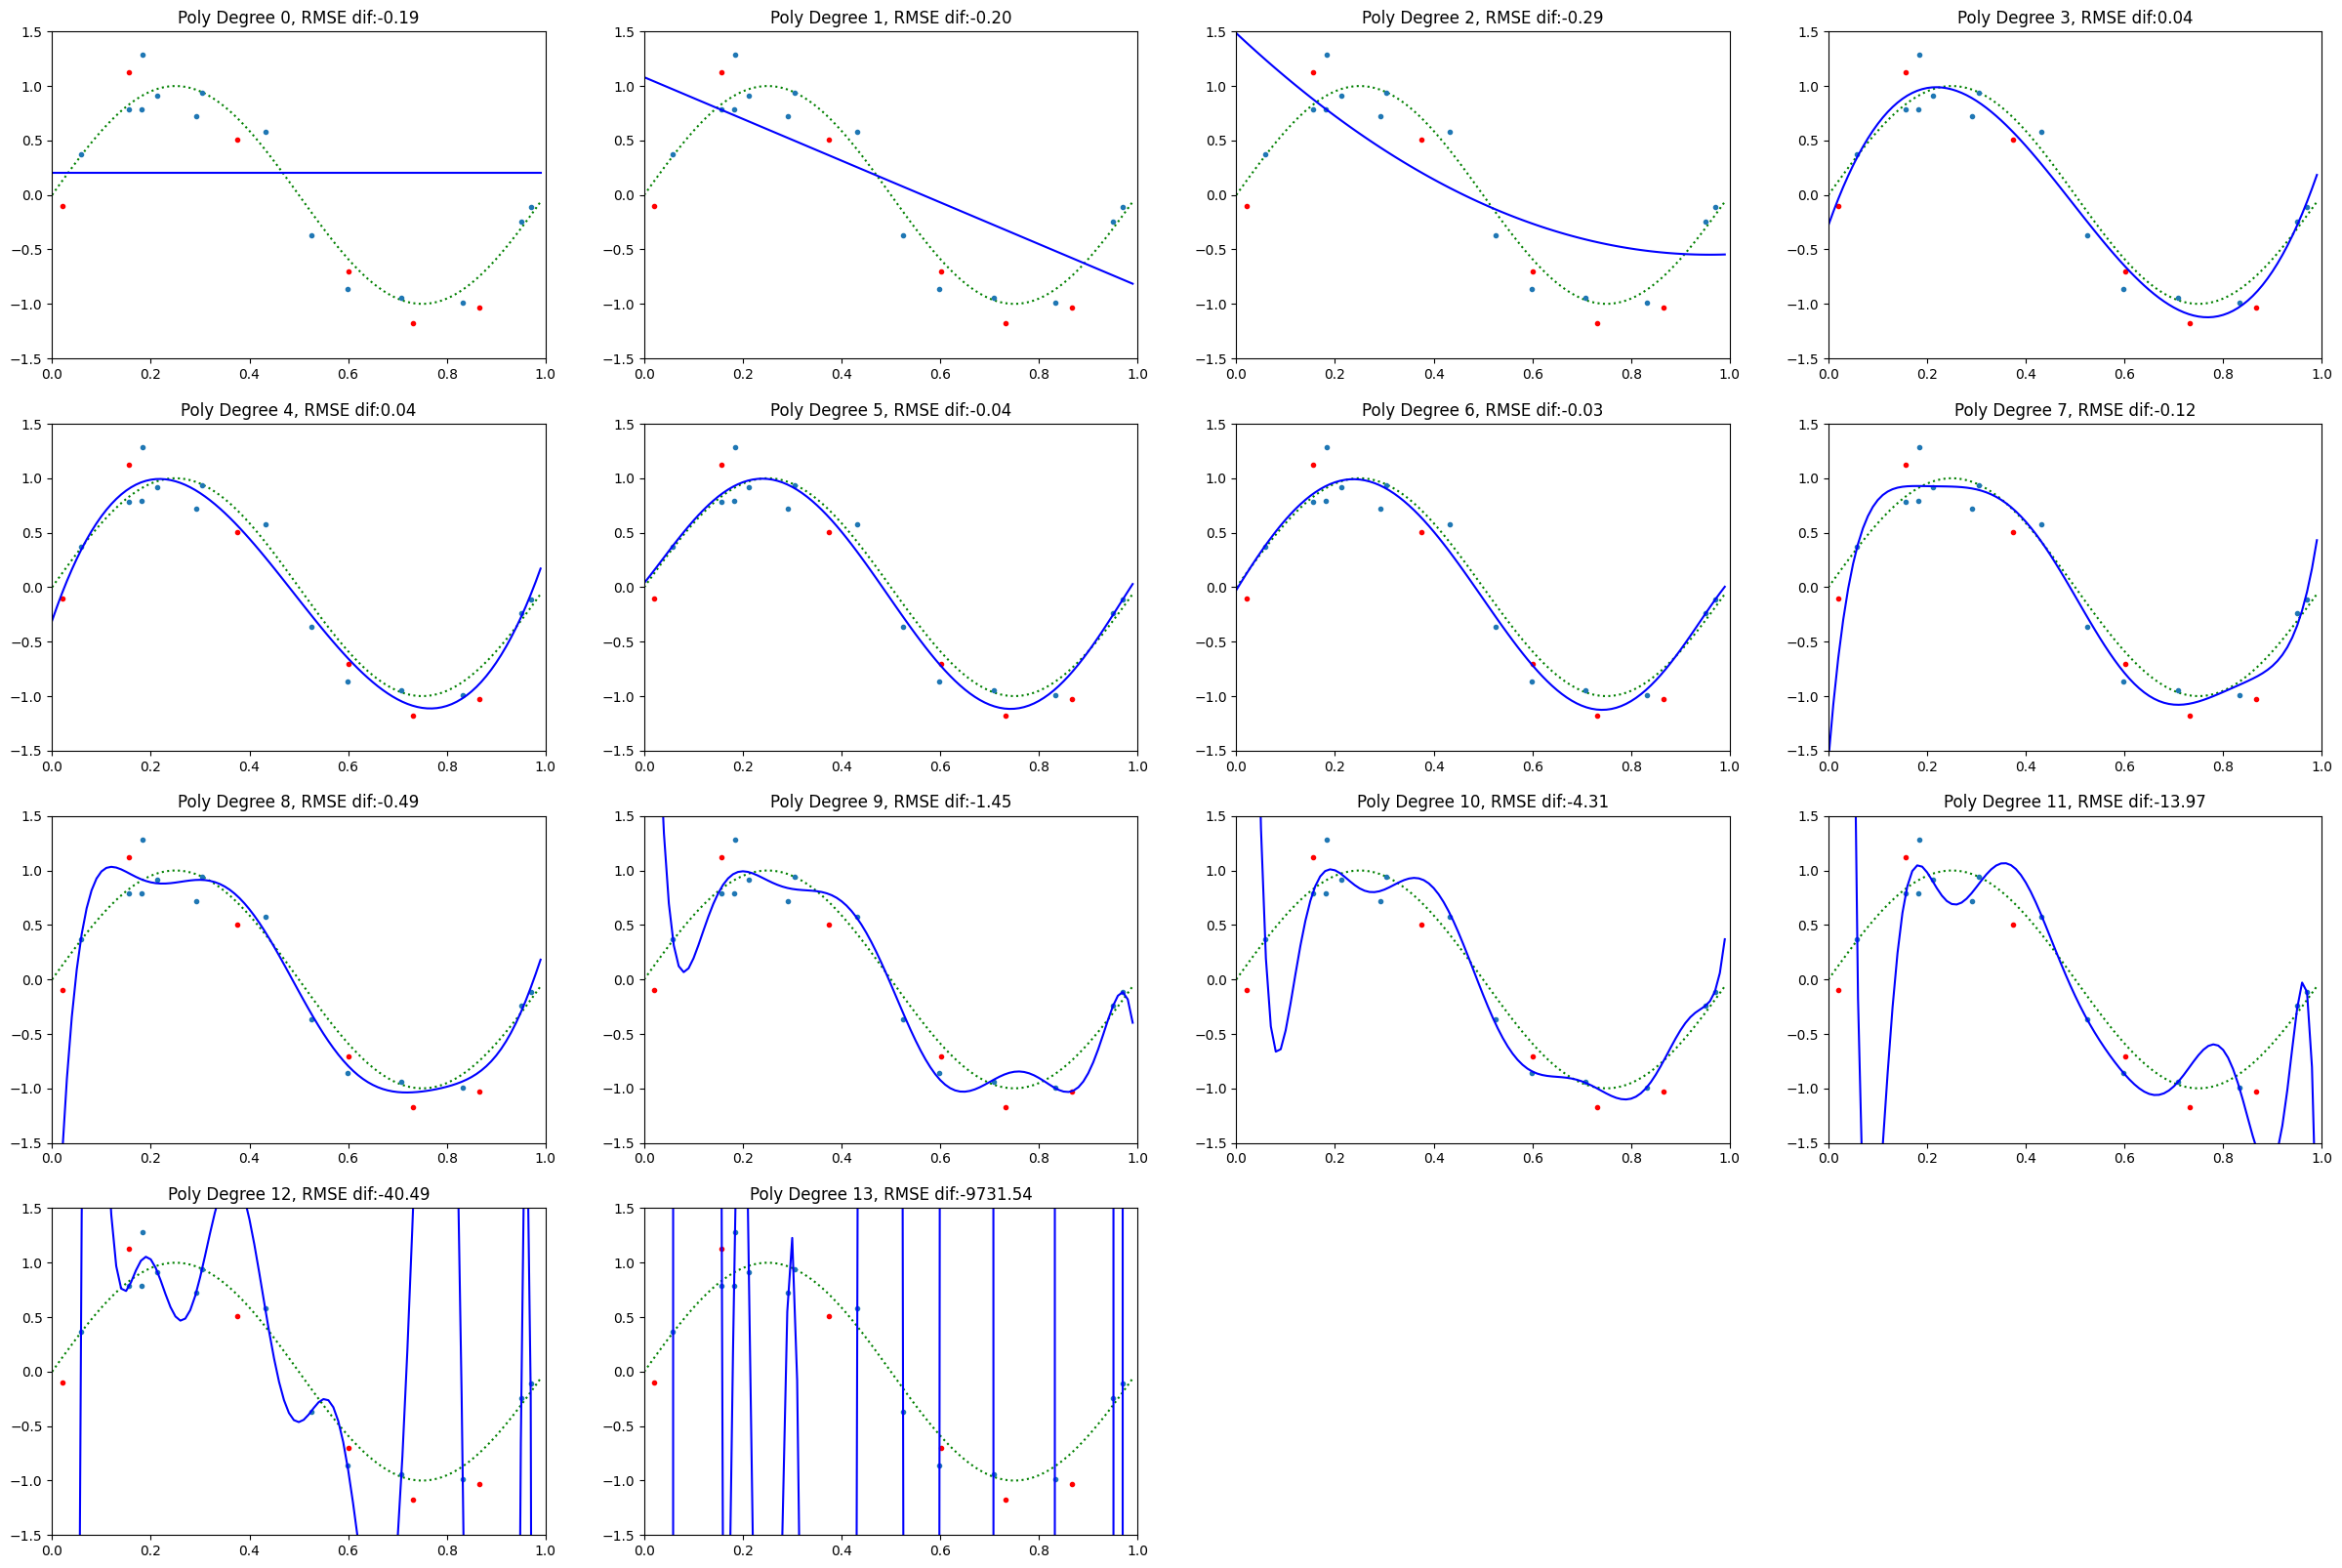

In [32]:
plt.plot( poly_degrees, rmse_train, '-b.')
plt.plot( poly_degrees, rmse_val, '-r.')
plt.axis((0,max_poly_degree-1,0,10))
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.figure(figsize=(30,20))
for p in poly_degrees:
    plt.subplot(4, 4, p+1)
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, 'r.')
    plt.plot(x_all, y_pol, 'b')
    plt.title('Poly Degree {}, RMSE dif:{:.2f}'.format(p, rmse_train[p] - rmse_val[p]))
    plt.axis((0, 1, -1.5, 1.5))

In [ ]:
# Podemos observar que a partir de um valor do grau de polinomio o RMSE dos dados de treino e validacao se descolam,
# o que indica que o modelo decorou os dados de treino e naao consegue generaalizar os dados de validação